In [1]:
from agents import Consumer, Producer, Influencer
from content_market import ContentMarket
import numpy as np

In [2]:
num_producers = 5
num_influencers = 0
num_consumers = 5

topics = [[1, 10]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, num_producers, num_consumers, num_influencers)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
producer_colors = []
consumer_colors = []

for i in range(num_producers):
    #func = lambda x: exponential_decay(x, 1)
    # func = lambda x: 1.0
    func = lambda x: inverse_decay(x, 1, 2)
    producer = Producer(i, content_market.sample_topic(), func)
    content_market.add_producer(producer)
    
    color = np.random.rand(3,)
    producer_colors.append(color)

for i in range(num_consumers):
    #func = lambda x: exponential_decay(x, 1)
    #func = lambda x : 1.0
    func = lambda x: inverse_decay(x, 1, 2)
    consumer = Consumer(i, content_market.sample_topic(), func, 1, .1, 1)
    content_market.add_consumer(consumer)

    color = np.random.rand(3,)
    consumer_colors.append(color)

In [6]:
import matplotlib.pyplot as plt

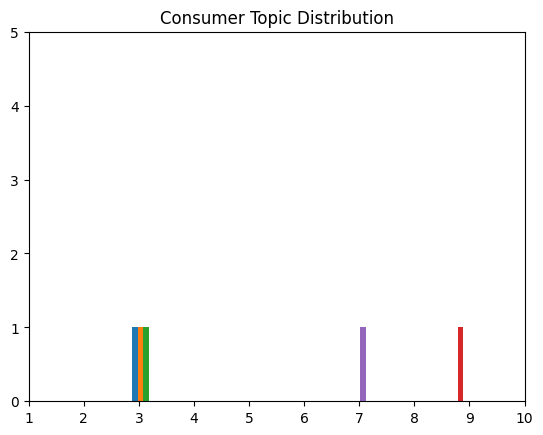

In [7]:
plt.figure()
plt.title("Consumer Topic Distribution")
plt.hist([c.main_interest for c in content_market.consumers])
plt.yticks(range(0, num_consumers + 1))
plt.xticks(range(1, 11))
plt.show()

In [8]:
consumer_stats, influencer_stats, producer_stats, total_stats, average_stats = content_market.optimize(1, 1, 100)

Iteration 0 / 100 done.
Total Social Welfare: 1.9608807750535069
Iteration 1 / 100 done.
Total Social Welfare: 2.011891630549502
Consumer rate change: 0.0
Consumer utility change: 0.01020217109919902
Producer topic change: 0.0
Producer utility change: 0.0
Converged.


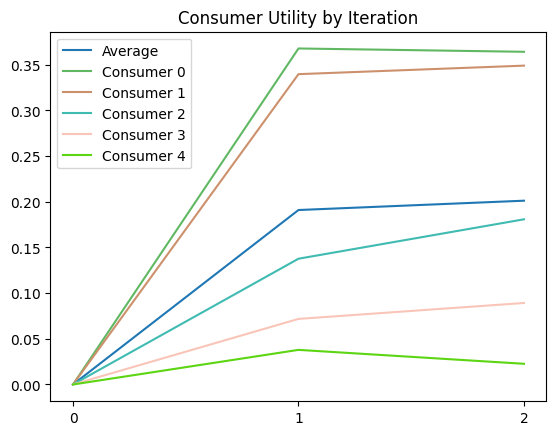

In [9]:
plt.figure()
plt.title("Consumer Utility by Iteration")
#plt.plot(total_stats['consumer_utilities'], label="Total")
plt.plot(average_stats['consumer_utilities'], label="Average")
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['utilities'], label="Consumer {}".format(consumer.index), color=consumer_colors[consumer.index])
plt.legend()
plt.xticks(range(len(average_stats['consumer_utilities'])))
plt.show()

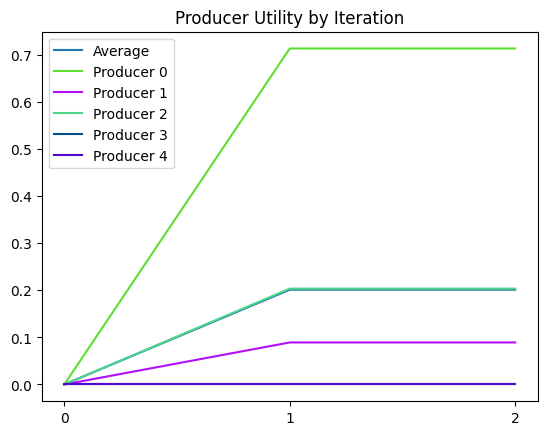

In [10]:
plt.figure()
plt.title("Producer Utility by Iteration")
#plt.plot(total_stats['producer_utilities'], label="Total")
plt.plot(average_stats['producer_utilities'], label="Average")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['utilities'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
plt.legend()
plt.xticks(range(len(average_stats['producer_utilities'])))
plt.show()

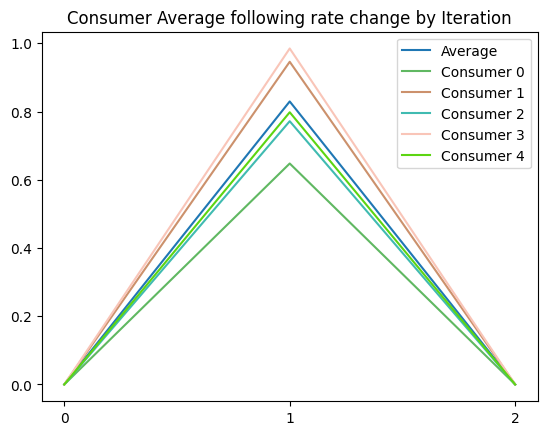

In [11]:
plt.figure()
plt.title("Consumer Average following rate change by Iteration")
plt.plot(average_stats['consumer_rate_change'], label='Average')
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['rate_change'], label='Consumer {}'.format(consumer.index), color=consumer_colors[consumer.index])
plt.legend()
plt.xticks(range(len(average_stats['consumer_rate_change'])))
plt.show()

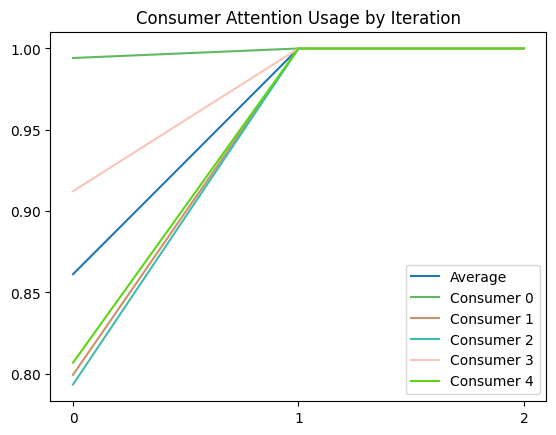

In [12]:
plt.figure()
plt.title("Consumer Attention Usage by Iteration")
plt.plot(average_stats['consumer_attention_used'], label='Average')
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['attention_used'], label='Consumer {}'.format(consumer.index), color=consumer_colors[consumer.index])
plt.legend()
plt.xticks(range(len(average_stats['consumer_attention_used'])))
plt.show()

In [13]:
consumer_stats

{0: {'following_rates': [array([0.42784183, 0.25069752, 0.12163673, 0.08571031, 0.02803573,
          0.08022915]),
   array([1.00000000e+00, 6.66133815e-16, 2.20309881e-16, 0.00000000e+00,
          2.52626512e-16, 0.00000000e+00]),
   array([1.00000000e+00, 6.66133815e-16, 2.20309881e-16, 0.00000000e+00,
          2.52626512e-16, 0.00000000e+00])],
  'utilities': [0, 0.3678413126545746, 0.36421942246392597],
  'rate_change': [0, 0.6477489422212314, 0.0],
  'attention_used': [0.994151264474871,
   1.0000000000000009,
   1.0000000000000009]},
 1: {'following_rates': [array([0.15652063, 0.41009199, 0.06022286, 0.02608259, 0.06665667,
          0.07976786]),
   array([1.00000000e+00, 4.82947016e-15, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00]),
   array([1.00000000e+00, 4.82947016e-15, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00])],
  'utilities': [0, 0.3397283895648694, 0.34905182909147764],
  'rate_change': [0, 0.94591014502004

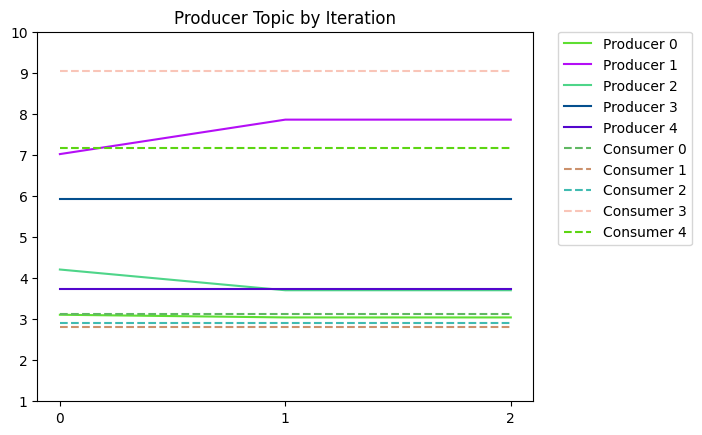

In [14]:
plt.figure()
plt.title("Producer Topic by Iteration")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topics'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
for consumer in content_market.consumers:
    plt.plot([consumer.main_interest] * len(producer_stats[producer.index]['topics']), label='Consumer {}'.format(consumer.index), linestyle='--', color=consumer_colors[consumer.index])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(topics[0][0], topics[0][1])
plt.xticks(range(len(producer_stats[producer.index]['topics'])))
plt.show()

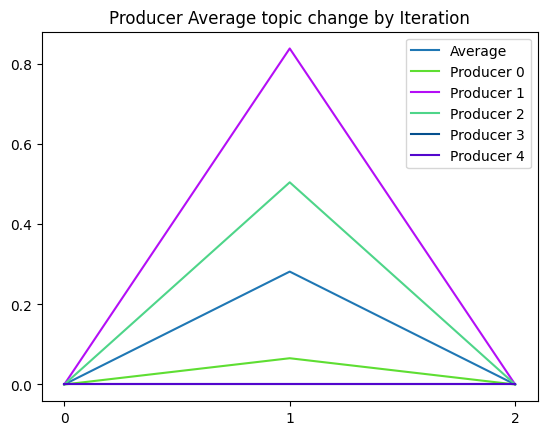

In [15]:
plt.figure()
plt.title("Producer Average topic change by Iteration")
plt.plot(average_stats['producer_topic_change'], label='Average')
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topic_change'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
plt.legend()
plt.xticks(range(len(average_stats['producer_topic_change'])))
plt.show()

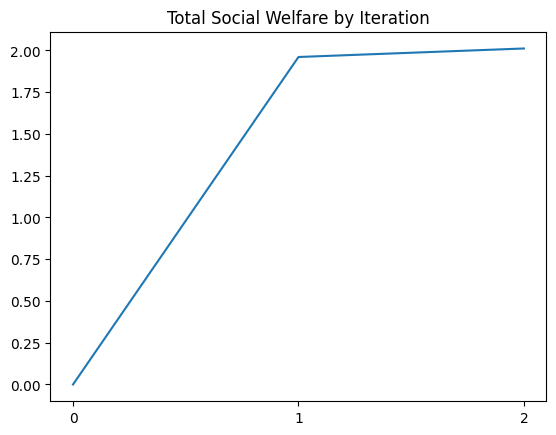

In [16]:
plt.figure()
plt.title("Total Social Welfare by Iteration")
plt.plot(total_stats['social_welfare'], label="Total")
plt.xticks(range(len(total_stats['social_welfare'])))
plt.show()

In [17]:
import numpy as np

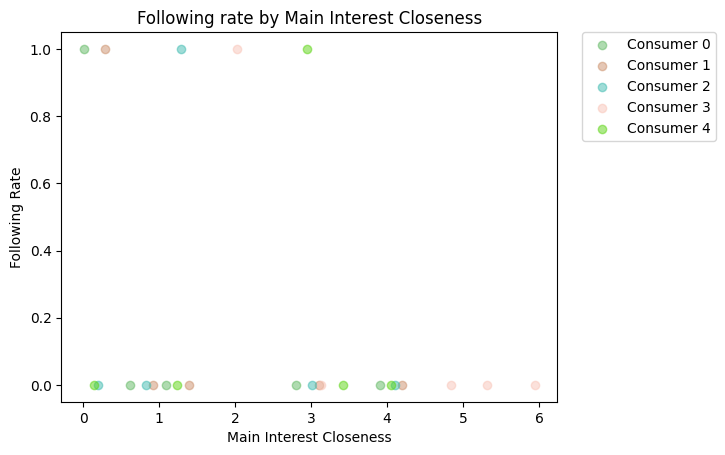

In [18]:
plt.figure()
plt.title("Following rate by Main Interest Closeness")
plt.xlabel("Main Interest Closeness")
plt.ylabel("Following Rate")
for consumer in content_market.consumers:
    interest_closeness = []
    following_rate = []
    for producer in content_market.producers:
        ending_rate = consumer_stats[consumer.index]['following_rates'][-1][producer.index]
        interest_closeness.append(np.linalg.norm(consumer.main_interest - producer.main_interest))
        following_rate.append(ending_rate)
    plt.scatter(interest_closeness, following_rate, color=consumer_colors[consumer.index], alpha=0.5, label='Consumer {}'.format(consumer.index))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

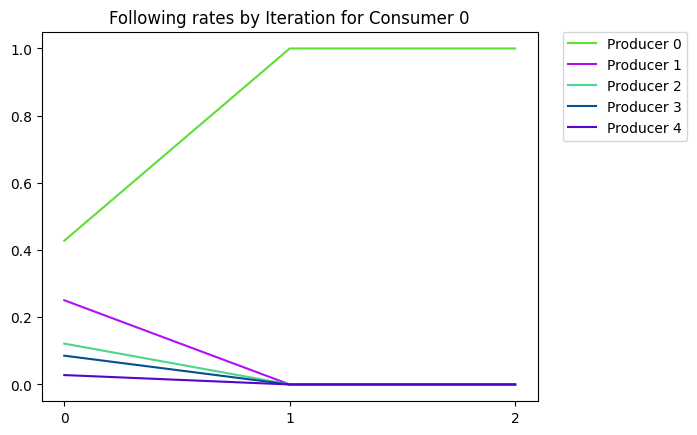

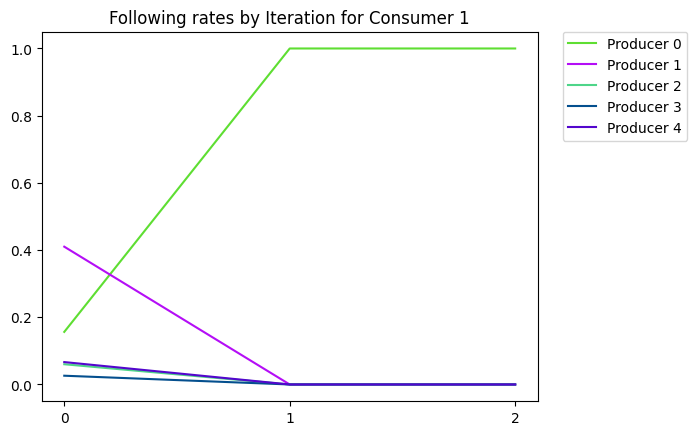

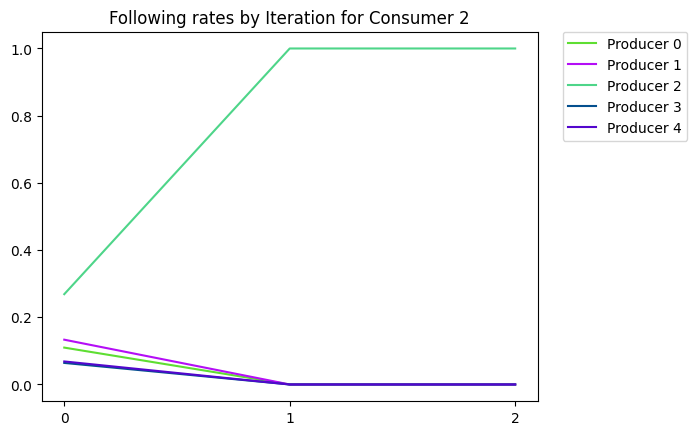

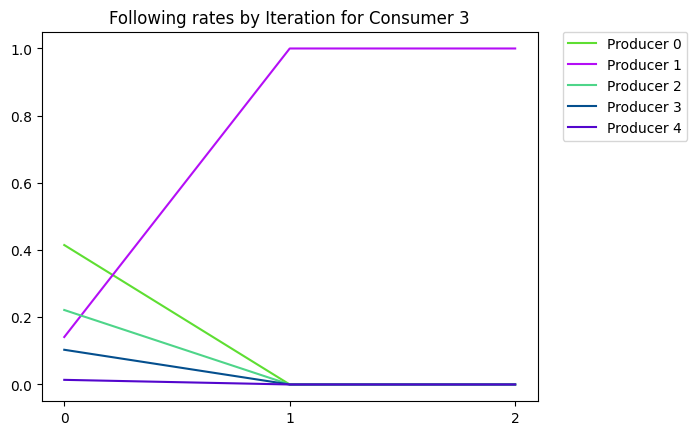

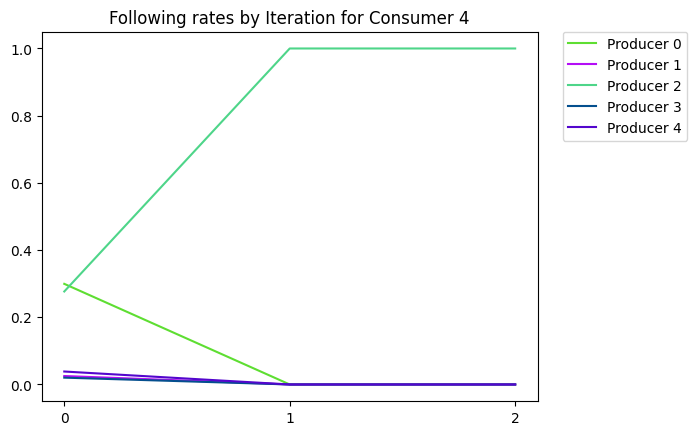

In [19]:
for consumer in content_market.consumers:
    plt.figure()
    plt.title(f"Following rates by Iteration for Consumer {consumer.index}")
    for producer in content_market.producers:
        rate_by_iteration = [vec[producer.index] for vec in consumer_stats[consumer.index]['following_rates']]
        plt.plot(rate_by_iteration, label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(range(len(rate_by_iteration)))
    plt.show()